In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width = 180
data_dir = "/content/flowers"

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

In [5]:
x_train = train_datagen.flow_from_directory('/content/flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

Found 4317 images belonging to 5 classes.


In [6]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("vertical",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [7]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()

In [8]:
#Image Augumentation accuracy
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [9]:
training_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=57,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [10]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
seed=107,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [11]:
training_ds.class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

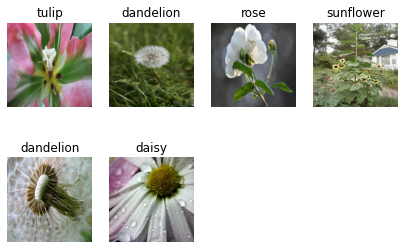

In [12]:
plt.figure(figsize=(7, 7))
for data, labels in training_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(data[i].numpy().astype("uint8"))
    plt.title(training_ds.class_names[labels[i]])
    plt.axis("off")

In [13]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))

In [14]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu"))

In [17]:
model.add(Dense(5, activation = "softmax"))

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(x_train, epochs = 15, steps_per_epoch = len(x_train))

Epoch 1/15
44/44 [==============================] - 30s 627ms/step - loss: 1.6264 - accuracy: 0.3757
Epoch 2/15
44/44 [==============================] - 27s 615ms/step - loss: 1.1473 - accuracy: 0.5293
Epoch 3/15
44/44 [==============================] - 27s 605ms/step - loss: 1.0621 - accuracy: 0.5680
Epoch 4/15
44/44 [==============================] - 27s 598ms/step - loss: 1.0014 - accuracy: 0.6034
Epoch 5/15
44/44 [==============================] - 27s 605ms/step - loss: 0.9545 - accuracy: 0.6268
Epoch 6/15
44/44 [==============================] - 27s 599ms/step - loss: 0.8956 - accuracy: 0.6502
Epoch 7/15
44/44 [==============================] - 27s 601ms/step - loss: 0.8710 - accuracy: 0.6627
Epoch 8/15
44/44 [==============================] - 27s 602ms/step - loss: 0.8354 - accuracy: 0.6806
Epoch 9/15
44/44 [==============================] - 27s 602ms/step - loss: 0.8215 - accuracy: 0.6822
Epoch 10/15
44/44 [==============================] - 27s 601ms/step - loss: 0.7984 - accura

In [20]:
model.save("flowers.h5")

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model = load_model("/content/flowers.h5")

In [28]:
tulip_img = image.load_img('/content/flowers/tulip/11441893003_ab83672800.jpg',target_size=(64,64))
x = image.img_to_array(tulip_img)
x = np.expand_dims(x,axis=0)
predicted_class=model.predict(x)

In [29]:
labels = ['daisy','dandelion','roses','sunflowers','tulips']
labels[np.argmax(predicted_class)]

'tulips'

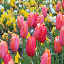

In [30]:
tulip_img